In [1]:
import os, cv2, itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython import display
from sklearn.utils import *

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
import math
from keras.layers import Dense, Dropout, Activation, Flatten
from torch.utils.data import TensorDataset, DataLoader


2022-04-13 14:47:46.660181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/gagandeep/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/lib:
2022-04-13 14:47:46.660206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from numpy import array

In [4]:
TRAIN_DIR = './archive/level_5/'
# TEST_DIR = './test1/'

ROWS = 32
COLS = 32
CHANNELS = 3
NUM_OF_LETTERS = 5

In [5]:
def generate_y():
    filename = './archive/labels_level_5.csv'
    df = pd.read_csv(filename)
    y=[]
    y_digits=[]
    for i in range(df.shape[0]):
        label = np.zeros((NUM_OF_LETTERS, 10))
        digits = [int(d) for d in str(df.iloc[i, 1])]
#         print(df.iloc[i, 1])
        for j in range(NUM_OF_LETTERS):
            label[j, digits[j]] = 1
        y.append(label)
        y_digits.append(digits)
    return y,y_digits

In [6]:
train_images = [TRAIN_DIR+i for i in sorted(os.listdir(TRAIN_DIR))]
# test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [7]:
len(train_images)
train_images[0]

'./archive/level_5/file_1.png'

In [8]:
def prep_data(images):
    X=[]
    m = len(images)
    n_x = CHANNELS*ROWS*COLS
    for i in images:
#         print(i)
#         print(os.path.join(r, i))
        #img = cv2.imread(os.path.join(r, i))
        img = cv2.imread(i)
#         print(img.shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
        img = np.reshape(img, (1,img.shape[0], img.shape[1]))/255
#         print(img.shape)
        X.append(img)
#     print("X.shape is {}".format(X.shape))

    return X


In [9]:
X_train = prep_data(train_images)

In [10]:
type(X_train)

list

In [11]:
a=array(X_train)
a.shape

(10000, 1, 32, 32)

In [12]:
y_train ,y_digits= generate_y()

In [13]:
y_digits[0]

[4, 9, 4, 8, 9]

In [14]:
y_train[0]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [15]:
y_train[0].shape

(5, 10)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [17]:
X_test[0].shape

(1, 32, 32)

In [18]:
y_test[0].shape

(5, 10)

In [19]:
X_train = torch.Tensor(X_train) # transform to torch tensor
# X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
y_train = torch.Tensor(y_train)
# y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)

# X_train = Variable(torch.from_numpy(X_train)).type(torch.LongTensor)
# y_train = Variable(torch.from_numpy(y_train)).type(torch.LongTensor)


my_dataset = TensorDataset(X_train,y_train) # create your dataset
trainloader = DataLoader(my_dataset,batch_size=32)

/tmp/ipykernel_2347796/1050324521.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  X_train = torch.Tensor(X_train) # transform to torch tensor


In [20]:
X_test = torch.Tensor(X_test) # transform to torch tensor
y_test = torch.Tensor(y_test)

my_testdataset = TensorDataset(X_test,y_test) # create your datset
testloader = DataLoader(my_testdataset,batch_size=32)

In [21]:
epochs = 50
batch_size = 32
learning_rate = 0.01
momentum = 0.9
log_interval = 10

VGG11

In [22]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        #define convulation and batch normalization layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_bn = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv4_bn = nn.BatchNorm2d(256)

        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv5_bn = nn.BatchNorm2d(512)

        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv6_bn = nn.BatchNorm2d(512)

        self.conv7 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv7_bn = nn.BatchNorm2d(512)

        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv8_bn = nn.BatchNorm2d(512)
        
        #Connect the above layers sequentially
        self.layers1 = nn.Sequential(self.conv1, self.conv1_bn, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
                                    self.conv2, self.conv2_bn, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
                                    self.conv3, self.conv3_bn, nn.ReLU(),
                                    self.conv4, self.conv4_bn, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
                                    self.conv5, self.conv5_bn, nn.ReLU(),
                                    self.conv6, self.conv6_bn, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
                                    self.conv7, self.conv7_bn, nn.ReLU(),
                                    self.conv8, self.conv8_bn, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        
        #Define linear layers
        self.fc1 = nn.Linear(in_features=512, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=50)
        self.dropout = nn.Dropout(0.3)

        #Connect the linear layers sequentially
        self.layers2 = nn.Sequential(self.fc1, nn.ReLU(), self.dropout,
                                    self.fc2, nn.ReLU(), self.dropout,
                                    self.fc3)
        
        self.softmax = nn.Softmax(1)

    def forward(self, x):
        x = self.layers1(x)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.layers2(x)
        x = torch.reshape(x,(-1,5,10))
#         out = [Dense(10, name='digit%d' % i, activation='softmax')(x) 
#         for i in range(NUM_OF_LETTERS):
        x = self.softmax(x)
#         out = [Dense(10, name='digit%d' % i, activation='softmax')(x) 
#         for i in range(NUM_OF_LETTERS):
#         x = [nn.Softmax(1)(x) for i in range(NUM_OF_LETTERS)]
        
#         print("Soft model",x.shape)
        return x

In [23]:
model = Net() 
print(model)

Net(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_bn): BatchNorm2d(512, eps=1e-05, momentum=

In [24]:
params = list(model.parameters())
print(len(params))
print(params[0].size())


38
torch.Size([64, 1, 3, 3])


In [25]:
len(X_train)

8000

In [26]:
# the loss function
criterion = nn.CrossEntropyLoss(reduction='none')
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [27]:
def train(model, trainloader, optimizer, criterion):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    y_decoded=[]
    y_predicted=[]
    total_acc = 0
    acc_in_img = [0] * 5
    
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader),position=0, leave=True):
        counter += 1
        image, labels = data

       
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(image)

        y_decoded = []
        for i,x in enumerate(labels):
            _, code = torch.max(x.data, 1) 
            y_decoded.append(code)
       

        # calculate the loss
        outputs_loss=torch.reshape(outputs,(-1,10,5))
        labels_loss=torch.reshape(labels,(-1,10,5))
        
        loss = criterion(outputs_loss, labels_loss)

        loss=loss.mean(dim=1)

        loss=loss.mean(dim=0)   
        
        train_running_loss += loss.item()
        
        y_predicted = []
        
        # calculate the accuracy
        for i,x in enumerate(outputs):
            _, code = torch.max(x.data, 1) 
            y_predicted.append(code)
        
        for i, j in zip(y_predicted,y_decoded):
            
            if (i==j).sum().item() == 5 :
                total_acc += 1
#                 print("correctly classified image", i, j)
                
            for z, (preds, labels) in enumerate(zip(i, j)):

                if preds == labels:
                    acc_in_img[z] += 1
           
        loss.backward()
        
        #update the grad values
        optimizer.step()

    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (total_acc / len(trainloader.dataset))
    for i in range(5):
        acc_in_img[i] = acc_in_img[i]/ len(trainloader.dataset)
        print("digit " + str(i) + " accuracy: " + str(acc_in_img[i]))
    return epoch_loss, epoch_acc, acc_in_img

In [28]:
def validate(model, testloader, criterion):
    model.eval()
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    y_decoded=[]
    y_predicted=[]
    test_acc_in_img=[0]*5
    total_acc = 0
    
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            
#             labels=labels.reshape(labels.shape[0],)
            # forward pass
            outputs = model(image)
            y_decoded=[]
            for i,x in enumerate(labels):
                _, code = torch.max(x.data, 1) 
                y_decoded.append(code)              
                
                
            # calculate the loss
            outputs_loss=torch.reshape(outputs,(-1,10,5))
            labels_loss=torch.reshape(labels,(-1,10,5))

            loss = criterion(outputs_loss, labels_loss)
    #         print("LOSS",loss.shape)

            loss=loss.mean(dim=1)

            loss=loss.mean(dim=0)   

            valid_running_loss += loss.item()
            

            # calculate the accuracy for each class
            y_predicted=[]
            for i,x in enumerate(outputs):
                _, code = torch.max(x.data, 1) 
                y_predicted.append(code)
        
            for i, j in zip(y_predicted,y_decoded):

                if (i==j).sum().item() == 5 :
                    total_acc += 1
#                     print("correctly classified image", i, j)

                for z, (preds, labels) in enumerate(zip(i, j)):

                    if preds == labels:
                        test_acc_in_img[z] += 1
        
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (total_acc / len(testloader.dataset))
    for i in range(5):
        test_acc_in_img[i] = test_acc_in_img[i] / len(testloader.dataset)
        print("digit " + str(i) + " accuracy: " + str(test_acc_in_img[i]))
    
    return epoch_loss, epoch_acc , test_acc_in_img

In [29]:
# start the training
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
train_digit_arr, valid_digit_arr =[], []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc , train_acc_in_img = train(model,trainloader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc , test_acc_in_img = validate(model, testloader,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    train_digit_arr.append(train_acc_in_img)
    valid_digit_arr.append(test_acc_in_img)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, Training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, Validation acc: {valid_epoch_acc:.3f}")
    print('-' * 60)

Epoch 1 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.1125
digit 1 accuracy: 0.1045
digit 2 accuracy: 0.092
digit 3 accuracy: 0.09625
digit 4 accuracy: 0.095125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.118
digit 1 accuracy: 0.108
digit 2 accuracy: 0.095
digit 3 accuracy: 0.0975
digit 4 accuracy: 0.0985


Training loss: 2.300, Training acc: 0.000
Validation loss: 2.299, Validation acc: 0.000
------------------------------------------------------------
Epoch 2 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.11775
digit 1 accuracy: 0.107
digit 2 accuracy: 0.099875
digit 3 accuracy: 0.1055
digit 4 accuracy: 0.09925
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.116
digit 1 accuracy: 0.1155
digit 2 accuracy: 0.103
digit 3 accuracy: 0.1005
digit 4 accuracy: 0.0985


Training loss: 2.299, Training acc: 0.000
Validation loss: 2.299, Validation acc: 0.050
------------------------------------------------------------
Epoch 3 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.12475
digit 1 accuracy: 0.107875
digit 2 accuracy: 0.10075
digit 3 accuracy: 0.105875
digit 4 accuracy: 0.104
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1265
digit 1 accuracy: 0.1135
digit 2 accuracy: 0.097
digit 3 accuracy: 0.101
digit 4 accuracy: 0.0965


Training loss: 2.298, Training acc: 0.000
Validation loss: 2.299, Validation acc: 0.000
------------------------------------------------------------
Epoch 4 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.13175
digit 1 accuracy: 0.112375
digit 2 accuracy: 0.111875
digit 3 accuracy: 0.115375
digit 4 accuracy: 0.109125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.125
digit 1 accuracy: 0.105
digit 2 accuracy: 0.09
digit 3 accuracy: 0.106
digit 4 accuracy: 0.1


Training loss: 2.295, Training acc: 0.013
Validation loss: 2.299, Validation acc: 0.000
------------------------------------------------------------
Epoch 5 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.14725
digit 1 accuracy: 0.120375
digit 2 accuracy: 0.122625
digit 3 accuracy: 0.128375
digit 4 accuracy: 0.11675
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.11
digit 1 accuracy: 0.097
digit 2 accuracy: 0.0985
digit 3 accuracy: 0.1005
digit 4 accuracy: 0.088


Training loss: 2.292, Training acc: 0.000
Validation loss: 2.301, Validation acc: 0.000
------------------------------------------------------------
Epoch 6 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.1745
digit 1 accuracy: 0.133625
digit 2 accuracy: 0.134125
digit 3 accuracy: 0.141625
digit 4 accuracy: 0.1275
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1115
digit 1 accuracy: 0.106
digit 2 accuracy: 0.1
digit 3 accuracy: 0.0965
digit 4 accuracy: 0.1


Training loss: 2.284, Training acc: 0.000
Validation loss: 2.306, Validation acc: 0.000
------------------------------------------------------------
Epoch 7 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.1945
digit 1 accuracy: 0.1515
digit 2 accuracy: 0.13925
digit 3 accuracy: 0.149875
digit 4 accuracy: 0.137
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.112
digit 1 accuracy: 0.109
digit 2 accuracy: 0.1015
digit 3 accuracy: 0.0935
digit 4 accuracy: 0.101


Training loss: 2.273, Training acc: 0.013
Validation loss: 2.314, Validation acc: 0.000
------------------------------------------------------------
Epoch 8 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.219125
digit 1 accuracy: 0.16675
digit 2 accuracy: 0.160375
digit 3 accuracy: 0.16825
digit 4 accuracy: 0.14625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.104
digit 1 accuracy: 0.094
digit 2 accuracy: 0.1085
digit 3 accuracy: 0.107
digit 4 accuracy: 0.099


Training loss: 2.257, Training acc: 0.000
Validation loss: 2.329, Validation acc: 0.000
------------------------------------------------------------
Epoch 9 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.244375
digit 1 accuracy: 0.18075
digit 2 accuracy: 0.174375
digit 3 accuracy: 0.1845
digit 4 accuracy: 0.158
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.112
digit 1 accuracy: 0.094
digit 2 accuracy: 0.111
digit 3 accuracy: 0.1065
digit 4 accuracy: 0.101


Training loss: 2.239, Training acc: 0.013
Validation loss: 2.329, Validation acc: 0.000
------------------------------------------------------------
Epoch 10 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.266375
digit 1 accuracy: 0.187875
digit 2 accuracy: 0.19275
digit 3 accuracy: 0.196375
digit 4 accuracy: 0.180375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.114
digit 1 accuracy: 0.1065
digit 2 accuracy: 0.103
digit 3 accuracy: 0.1085
digit 4 accuracy: 0.1055


Training loss: 2.221, Training acc: 0.025
Validation loss: 2.333, Validation acc: 0.000
------------------------------------------------------------
Epoch 11 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.30875
digit 1 accuracy: 0.214
digit 2 accuracy: 0.2085
digit 3 accuracy: 0.22225
digit 4 accuracy: 0.20075
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1135
digit 1 accuracy: 0.1
digit 2 accuracy: 0.0905
digit 3 accuracy: 0.107
digit 4 accuracy: 0.098


Training loss: 2.199, Training acc: 0.013
Validation loss: 2.341, Validation acc: 0.000
------------------------------------------------------------
Epoch 12 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.324875
digit 1 accuracy: 0.231125
digit 2 accuracy: 0.222625
digit 3 accuracy: 0.2495
digit 4 accuracy: 0.21625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.108
digit 1 accuracy: 0.0895
digit 2 accuracy: 0.1005
digit 3 accuracy: 0.0985
digit 4 accuracy: 0.099


Training loss: 2.180, Training acc: 0.075
Validation loss: 2.347, Validation acc: 0.000
------------------------------------------------------------
Epoch 13 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.335
digit 1 accuracy: 0.24125
digit 2 accuracy: 0.24175
digit 3 accuracy: 0.255625
digit 4 accuracy: 0.227125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1145
digit 1 accuracy: 0.0855
digit 2 accuracy: 0.095
digit 3 accuracy: 0.099
digit 4 accuracy: 0.1005


Training loss: 2.162, Training acc: 0.050
Validation loss: 2.353, Validation acc: 0.000
------------------------------------------------------------
Epoch 14 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.35
digit 1 accuracy: 0.265375
digit 2 accuracy: 0.260625
digit 3 accuracy: 0.275125
digit 4 accuracy: 0.246625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.116
digit 1 accuracy: 0.089
digit 2 accuracy: 0.0995
digit 3 accuracy: 0.096
digit 4 accuracy: 0.0925


Training loss: 2.140, Training acc: 0.062
Validation loss: 2.354, Validation acc: 0.000
------------------------------------------------------------
Epoch 15 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.369125
digit 1 accuracy: 0.282
digit 2 accuracy: 0.275625
digit 3 accuracy: 0.288125
digit 4 accuracy: 0.25475
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.098
digit 1 accuracy: 0.091
digit 2 accuracy: 0.1015
digit 3 accuracy: 0.087
digit 4 accuracy: 0.0915


Training loss: 2.124, Training acc: 0.088
Validation loss: 2.359, Validation acc: 0.000
------------------------------------------------------------
Epoch 16 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.375
digit 1 accuracy: 0.299
digit 2 accuracy: 0.28625
digit 3 accuracy: 0.30225
digit 4 accuracy: 0.268375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1035
digit 1 accuracy: 0.092
digit 2 accuracy: 0.11
digit 3 accuracy: 0.1
digit 4 accuracy: 0.0955


Training loss: 2.110, Training acc: 0.037
Validation loss: 2.362, Validation acc: 0.000
------------------------------------------------------------
Epoch 17 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.395875
digit 1 accuracy: 0.309625
digit 2 accuracy: 0.3025
digit 3 accuracy: 0.31475
digit 4 accuracy: 0.293625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.107
digit 1 accuracy: 0.089
digit 2 accuracy: 0.102
digit 3 accuracy: 0.104
digit 4 accuracy: 0.1005


Training loss: 2.091, Training acc: 0.150
Validation loss: 2.363, Validation acc: 0.000
------------------------------------------------------------
Epoch 18 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.406625
digit 1 accuracy: 0.326375
digit 2 accuracy: 0.313
digit 3 accuracy: 0.339
digit 4 accuracy: 0.306625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.115
digit 1 accuracy: 0.0975
digit 2 accuracy: 0.11
digit 3 accuracy: 0.105
digit 4 accuracy: 0.1


Training loss: 2.078, Training acc: 0.150
Validation loss: 2.361, Validation acc: 0.000
------------------------------------------------------------
Epoch 19 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.404125
digit 1 accuracy: 0.34375
digit 2 accuracy: 0.333375
digit 3 accuracy: 0.35375
digit 4 accuracy: 0.317875
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1135
digit 1 accuracy: 0.099
digit 2 accuracy: 0.1015
digit 3 accuracy: 0.0985
digit 4 accuracy: 0.099


Training loss: 2.062, Training acc: 0.175
Validation loss: 2.360, Validation acc: 0.000
------------------------------------------------------------
Epoch 20 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.422875
digit 1 accuracy: 0.35075
digit 2 accuracy: 0.3455
digit 3 accuracy: 0.3705
digit 4 accuracy: 0.330375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.0985
digit 1 accuracy: 0.0955
digit 2 accuracy: 0.0915
digit 3 accuracy: 0.1
digit 4 accuracy: 0.097


Training loss: 2.048, Training acc: 0.225
Validation loss: 2.362, Validation acc: 0.000
------------------------------------------------------------
Epoch 21 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.430625
digit 1 accuracy: 0.366375
digit 2 accuracy: 0.357625
digit 3 accuracy: 0.370625
digit 4 accuracy: 0.353875
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1075
digit 1 accuracy: 0.0865
digit 2 accuracy: 0.1025
digit 3 accuracy: 0.1035
digit 4 accuracy: 0.1035


Training loss: 2.035, Training acc: 0.263
Validation loss: 2.366, Validation acc: 0.000
------------------------------------------------------------
Epoch 22 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.444875
digit 1 accuracy: 0.383875
digit 2 accuracy: 0.364
digit 3 accuracy: 0.393375
digit 4 accuracy: 0.362375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.107
digit 1 accuracy: 0.0935
digit 2 accuracy: 0.0975
digit 3 accuracy: 0.121
digit 4 accuracy: 0.1035


Training loss: 2.022, Training acc: 0.375
Validation loss: 2.363, Validation acc: 0.000
------------------------------------------------------------
Epoch 23 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.467375
digit 1 accuracy: 0.392375
digit 2 accuracy: 0.392125
digit 3 accuracy: 0.39975
digit 4 accuracy: 0.37825
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1075
digit 1 accuracy: 0.101
digit 2 accuracy: 0.1055
digit 3 accuracy: 0.1035
digit 4 accuracy: 0.105


Training loss: 2.007, Training acc: 0.438
Validation loss: 2.361, Validation acc: 0.000
------------------------------------------------------------
Epoch 24 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.467875
digit 1 accuracy: 0.404125
digit 2 accuracy: 0.404375
digit 3 accuracy: 0.416
digit 4 accuracy: 0.393375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.097
digit 1 accuracy: 0.094
digit 2 accuracy: 0.1045
digit 3 accuracy: 0.114
digit 4 accuracy: 0.107


Training loss: 1.997, Training acc: 0.475
Validation loss: 2.367, Validation acc: 0.000
------------------------------------------------------------
Epoch 25 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.467
digit 1 accuracy: 0.42775
digit 2 accuracy: 0.412875
digit 3 accuracy: 0.4225
digit 4 accuracy: 0.406875
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.104
digit 1 accuracy: 0.102
digit 2 accuracy: 0.105
digit 3 accuracy: 0.1005
digit 4 accuracy: 0.114


Training loss: 1.986, Training acc: 0.513
Validation loss: 2.366, Validation acc: 0.000
------------------------------------------------------------
Epoch 26 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.47975
digit 1 accuracy: 0.44225
digit 2 accuracy: 0.41875
digit 3 accuracy: 0.43475
digit 4 accuracy: 0.4125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1025
digit 1 accuracy: 0.098
digit 2 accuracy: 0.1055
digit 3 accuracy: 0.0945
digit 4 accuracy: 0.1135


Training loss: 1.975, Training acc: 0.675
Validation loss: 2.365, Validation acc: 0.000
------------------------------------------------------------
Epoch 27 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.491625
digit 1 accuracy: 0.4455
digit 2 accuracy: 0.4325
digit 3 accuracy: 0.450375
digit 4 accuracy: 0.42625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.0975
digit 1 accuracy: 0.094
digit 2 accuracy: 0.1015
digit 3 accuracy: 0.1155
digit 4 accuracy: 0.0945


Training loss: 1.967, Training acc: 0.713
Validation loss: 2.367, Validation acc: 0.000
------------------------------------------------------------
Epoch 28 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.501125
digit 1 accuracy: 0.458375
digit 2 accuracy: 0.44525
digit 3 accuracy: 0.45475
digit 4 accuracy: 0.444
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.0995
digit 1 accuracy: 0.098
digit 2 accuracy: 0.0995
digit 3 accuracy: 0.1005
digit 4 accuracy: 0.105


Training loss: 1.958, Training acc: 1.000
Validation loss: 2.368, Validation acc: 0.000
------------------------------------------------------------
Epoch 29 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.5035
digit 1 accuracy: 0.466875
digit 2 accuracy: 0.451625
digit 3 accuracy: 0.46025
digit 4 accuracy: 0.443375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1105
digit 1 accuracy: 0.1
digit 2 accuracy: 0.098
digit 3 accuracy: 0.1
digit 4 accuracy: 0.102


Training loss: 1.950, Training acc: 0.812
Validation loss: 2.366, Validation acc: 0.000
------------------------------------------------------------
Epoch 30 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.517625
digit 1 accuracy: 0.46975
digit 2 accuracy: 0.472
digit 3 accuracy: 0.474
digit 4 accuracy: 0.454625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.097
digit 1 accuracy: 0.095
digit 2 accuracy: 0.097
digit 3 accuracy: 0.09
digit 4 accuracy: 0.1055


Training loss: 1.941, Training acc: 0.988
Validation loss: 2.371, Validation acc: 0.000
------------------------------------------------------------
Epoch 31 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.518875
digit 1 accuracy: 0.4765
digit 2 accuracy: 0.47925
digit 3 accuracy: 0.47875
digit 4 accuracy: 0.461875
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.0935
digit 1 accuracy: 0.1015
digit 2 accuracy: 0.1115
digit 3 accuracy: 0.111
digit 4 accuracy: 0.1075


Training loss: 1.934, Training acc: 1.175
Validation loss: 2.367, Validation acc: 0.000
------------------------------------------------------------
Epoch 32 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.530375
digit 1 accuracy: 0.48225
digit 2 accuracy: 0.4885
digit 3 accuracy: 0.486
digit 4 accuracy: 0.475125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1125
digit 1 accuracy: 0.105
digit 2 accuracy: 0.094
digit 3 accuracy: 0.113
digit 4 accuracy: 0.116


Training loss: 1.926, Training acc: 1.225
Validation loss: 2.365, Validation acc: 0.000
------------------------------------------------------------
Epoch 33 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.536625
digit 1 accuracy: 0.49225
digit 2 accuracy: 0.495875
digit 3 accuracy: 0.497875
digit 4 accuracy: 0.48575
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1085
digit 1 accuracy: 0.088
digit 2 accuracy: 0.105
digit 3 accuracy: 0.103
digit 4 accuracy: 0.105


Training loss: 1.921, Training acc: 1.587
Validation loss: 2.368, Validation acc: 0.000
------------------------------------------------------------
Epoch 34 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.545125
digit 1 accuracy: 0.50725
digit 2 accuracy: 0.503125
digit 3 accuracy: 0.50125
digit 4 accuracy: 0.496375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.105
digit 1 accuracy: 0.099
digit 2 accuracy: 0.1055
digit 3 accuracy: 0.11
digit 4 accuracy: 0.1045


Training loss: 1.913, Training acc: 1.850
Validation loss: 2.367, Validation acc: 0.000
------------------------------------------------------------
Epoch 35 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.55125
digit 1 accuracy: 0.503625
digit 2 accuracy: 0.507125
digit 3 accuracy: 0.5085
digit 4 accuracy: 0.50125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.102
digit 1 accuracy: 0.094
digit 2 accuracy: 0.0975
digit 3 accuracy: 0.102
digit 4 accuracy: 0.104


Training loss: 1.908, Training acc: 1.725
Validation loss: 2.369, Validation acc: 0.000
------------------------------------------------------------
Epoch 36 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.561625
digit 1 accuracy: 0.508625
digit 2 accuracy: 0.5205
digit 3 accuracy: 0.51725
digit 4 accuracy: 0.506625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1005
digit 1 accuracy: 0.0995
digit 2 accuracy: 0.0965
digit 3 accuracy: 0.1055
digit 4 accuracy: 0.108


Training loss: 1.903, Training acc: 1.962
Validation loss: 2.369, Validation acc: 0.000
------------------------------------------------------------
Epoch 37 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.570125
digit 1 accuracy: 0.518625
digit 2 accuracy: 0.531625
digit 3 accuracy: 0.523375
digit 4 accuracy: 0.513625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.101
digit 1 accuracy: 0.0865
digit 2 accuracy: 0.103
digit 3 accuracy: 0.106
digit 4 accuracy: 0.104


Training loss: 1.899, Training acc: 2.113
Validation loss: 2.371, Validation acc: 0.000
------------------------------------------------------------
Epoch 38 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.576875
digit 1 accuracy: 0.529625
digit 2 accuracy: 0.523875
digit 3 accuracy: 0.5295
digit 4 accuracy: 0.522375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.102
digit 1 accuracy: 0.091
digit 2 accuracy: 0.1055
digit 3 accuracy: 0.1065
digit 4 accuracy: 0.1035


Training loss: 1.895, Training acc: 2.288
Validation loss: 2.373, Validation acc: 0.000
------------------------------------------------------------
Epoch 39 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.581125
digit 1 accuracy: 0.533
digit 2 accuracy: 0.532875
digit 3 accuracy: 0.538
digit 4 accuracy: 0.534125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.102
digit 1 accuracy: 0.101
digit 2 accuracy: 0.0995
digit 3 accuracy: 0.1075
digit 4 accuracy: 0.0975


Training loss: 1.890, Training acc: 2.188
Validation loss: 2.372, Validation acc: 0.000
------------------------------------------------------------
Epoch 40 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.590625
digit 1 accuracy: 0.539125
digit 2 accuracy: 0.547625
digit 3 accuracy: 0.5485
digit 4 accuracy: 0.537875
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.0995
digit 1 accuracy: 0.097
digit 2 accuracy: 0.089
digit 3 accuracy: 0.1015
digit 4 accuracy: 0.102


Training loss: 1.885, Training acc: 2.525
Validation loss: 2.371, Validation acc: 0.000
------------------------------------------------------------
Epoch 41 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.596375
digit 1 accuracy: 0.55125
digit 2 accuracy: 0.54625
digit 3 accuracy: 0.546875
digit 4 accuracy: 0.542125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1075
digit 1 accuracy: 0.0985
digit 2 accuracy: 0.101
digit 3 accuracy: 0.102
digit 4 accuracy: 0.1


Training loss: 1.881, Training acc: 2.775
Validation loss: 2.372, Validation acc: 0.000
------------------------------------------------------------
Epoch 42 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.597375
digit 1 accuracy: 0.557
digit 2 accuracy: 0.564375
digit 3 accuracy: 0.5585
digit 4 accuracy: 0.55175
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.106
digit 1 accuracy: 0.0975
digit 2 accuracy: 0.1005
digit 3 accuracy: 0.109
digit 4 accuracy: 0.0945


Training loss: 1.877, Training acc: 3.200
Validation loss: 2.368, Validation acc: 0.000
------------------------------------------------------------
Epoch 43 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.601375
digit 1 accuracy: 0.565625
digit 2 accuracy: 0.5665
digit 3 accuracy: 0.558875
digit 4 accuracy: 0.55275
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.104
digit 1 accuracy: 0.099
digit 2 accuracy: 0.098
digit 3 accuracy: 0.1095
digit 4 accuracy: 0.1025


Training loss: 1.875, Training acc: 2.938
Validation loss: 2.368, Validation acc: 0.000
------------------------------------------------------------
Epoch 44 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.6105
digit 1 accuracy: 0.567125
digit 2 accuracy: 0.5685
digit 3 accuracy: 0.571
digit 4 accuracy: 0.562625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1085
digit 1 accuracy: 0.101
digit 2 accuracy: 0.105
digit 3 accuracy: 0.1075
digit 4 accuracy: 0.1015


Training loss: 1.872, Training acc: 3.275
Validation loss: 2.368, Validation acc: 0.050
------------------------------------------------------------
Epoch 45 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.611375
digit 1 accuracy: 0.5715
digit 2 accuracy: 0.575875
digit 3 accuracy: 0.57625
digit 4 accuracy: 0.5675
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.0975
digit 1 accuracy: 0.094
digit 2 accuracy: 0.107
digit 3 accuracy: 0.1115
digit 4 accuracy: 0.107


Training loss: 1.869, Training acc: 3.513
Validation loss: 2.368, Validation acc: 0.000
------------------------------------------------------------
Epoch 46 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.618625
digit 1 accuracy: 0.584375
digit 2 accuracy: 0.5785
digit 3 accuracy: 0.580875
digit 4 accuracy: 0.577125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.105
digit 1 accuracy: 0.091
digit 2 accuracy: 0.104
digit 3 accuracy: 0.114
digit 4 accuracy: 0.0955


Training loss: 1.865, Training acc: 3.850
Validation loss: 2.364, Validation acc: 0.000
------------------------------------------------------------
Epoch 47 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.627125
digit 1 accuracy: 0.585375
digit 2 accuracy: 0.582375
digit 3 accuracy: 0.59125
digit 4 accuracy: 0.583625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.11
digit 1 accuracy: 0.097
digit 2 accuracy: 0.0975
digit 3 accuracy: 0.11
digit 4 accuracy: 0.0975


Training loss: 1.862, Training acc: 4.112
Validation loss: 2.364, Validation acc: 0.000
------------------------------------------------------------
Epoch 48 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.628625
digit 1 accuracy: 0.592625
digit 2 accuracy: 0.592125
digit 3 accuracy: 0.591875
digit 4 accuracy: 0.586125
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.105
digit 1 accuracy: 0.096
digit 2 accuracy: 0.099
digit 3 accuracy: 0.1135
digit 4 accuracy: 0.102


Training loss: 1.860, Training acc: 4.112
Validation loss: 2.363, Validation acc: 0.000
------------------------------------------------------------
Epoch 49 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.629375
digit 1 accuracy: 0.5945
digit 2 accuracy: 0.599125
digit 3 accuracy: 0.59825
digit 4 accuracy: 0.5915
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.104
digit 1 accuracy: 0.0945
digit 2 accuracy: 0.1045
digit 3 accuracy: 0.1165
digit 4 accuracy: 0.099


Training loss: 1.858, Training acc: 4.225
Validation loss: 2.361, Validation acc: 0.000
------------------------------------------------------------
Epoch 50 of 50


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.637125
digit 1 accuracy: 0.59625
digit 2 accuracy: 0.6005
digit 3 accuracy: 0.599125
digit 4 accuracy: 0.59025
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.103
digit 1 accuracy: 0.095
digit 2 accuracy: 0.1065
digit 3 accuracy: 0.111
digit 4 accuracy: 0.097


Training loss: 1.855, Training acc: 4.750
Validation loss: 2.359, Validation acc: 0.000
------------------------------------------------------------


In [30]:
#train_digit_arr

In [31]:
digit_acc = [[] for _ in range(5)]
for acc in train_digit_arr:
    k = 0
    for ac in acc:
        digit_acc[k].append(ac)
        k += 1
#digit_acc

In [32]:
# valid_digit_arr

In [33]:
valid_digit_acc = [[] for _ in range(5)]
for acc in valid_digit_arr:
    k = 0
    for ac in acc:
        valid_digit_acc[k].append(ac)
        k += 1
# valid_digit_acc

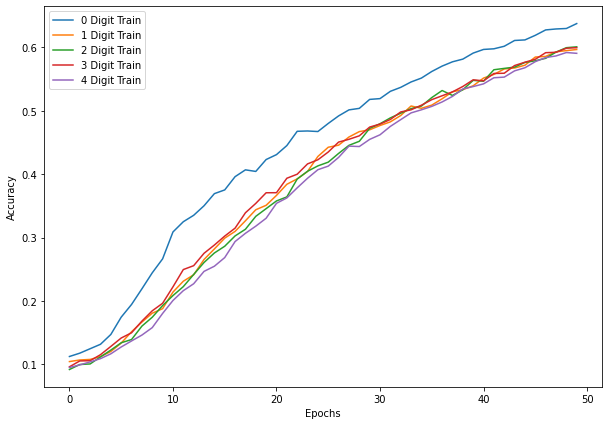

In [34]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.plot(digit_acc[i], label='%s Digit Train' % i)    

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('VGG_train_accuracy.jpg')
plt.show()

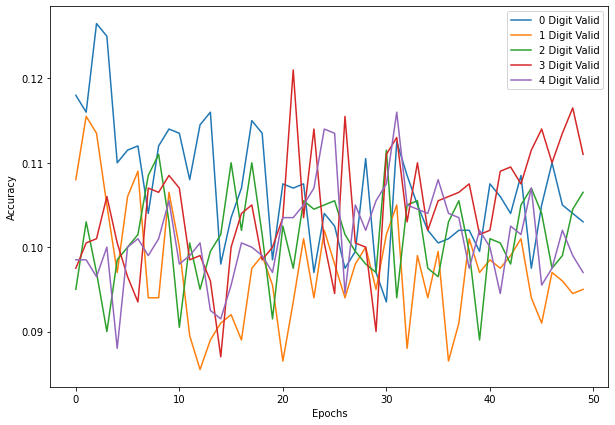

In [35]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.plot(valid_digit_acc[i], label='%s Digit Valid' % i)    

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('VGG_valid_accuracy.jpg')
plt.show()

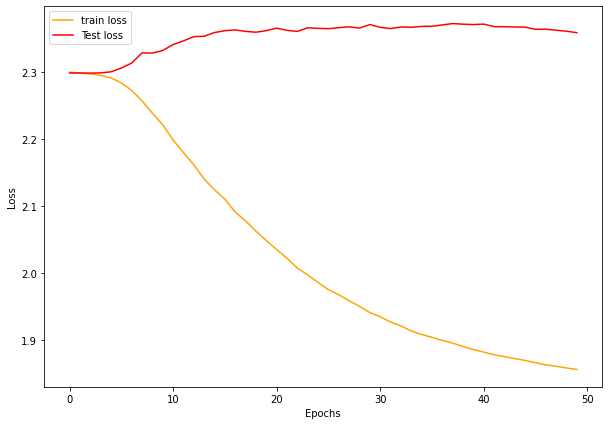

In [36]:
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='Test loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('VGG_loss.jpg')
plt.show()